In [1]:
import polars as pl
import os

cluster_file = "./k-means-8n.csv"
output_file = os.path.basename(cluster_file).split(".")[0] + ".png"
feat_file = "features_complete.csv"
cluster_df = pl.read_csv(cluster_file)
feat_df = pl.read_csv(feat_file)

df = feat_df.join(cluster_df, on="name", how="inner")
print(df)


shape: (204, 53)
┌──────────┬──────────┬──────────┬──────────┬───┬──────────┬────────────┬────────────────┬─────────┐
│ f1_max   ┆ f1_std   ┆ f1_mean  ┆ f2_max   ┆ … ┆ f19_std  ┆ f19_mean   ┆ name           ┆ cluster │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---      ┆ ---        ┆ ---            ┆ ---     │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆   ┆ f64      ┆ f64        ┆ str            ┆ i64     │
╞══════════╪══════════╪══════════╪══════════╪═══╪══════════╪════════════╪════════════════╪═════════╡
│ 0.985398 ┆ 0.011175 ┆ 0.968661 ┆ 0.588975 ┆ … ┆ 0.000058 ┆ 2.0121e-7  ┆ dance_data_190 ┆ 6       │
│          ┆          ┆          ┆          ┆   ┆          ┆            ┆ _corrected     ┆         │
│ 0.931043 ┆ 0.079408 ┆ 0.846652 ┆ 0.571822 ┆ … ┆ 0.000219 ┆ 0.000005   ┆ dance_data_59_ ┆ 1       │
│          ┆          ┆          ┆          ┆   ┆          ┆            ┆ corrected      ┆         │
│ 1.028447 ┆ 0.123747 ┆ 0.87609  ┆ 0.585827 ┆ … ┆ 0.000292 ┆ -0.000003  ┆ 

In [2]:
# LABAN change colomn name to human readable

df = df.select(
    pl.all().name.map(lambda col_name: 
        col_name.replace(
            'f1_', 'feet-to-hips-distance_'
        ).replace(
            'f2_', 'hands-to-shoulders-distance_'
        ).replace(
            'f3_', 'lhand-to-rhand-distance_'
        ).replace(
            'f4_', 'hands-to-head-distance_'
        ).replace(
            'f5_', 'hands-to-hips-distance_'
        ).replace(
            'f6_', 'pelvis-height_'
        ).replace(
            'f7_', 'hips-to-ground-minus-feet-to-hips_'
        ).replace(
            'f8_', 'gait-distance_'
        ).replace(
            'f30_', 'distance-covered-over-time_'
        ).replace(
            'f31_', 'area-covered-over-time_'
        ).replace(
            'f11_', 'pelvis-velocity_'
        ).replace(
            'f12_', 'solar-plexus-velocity_'
        ).replace(
            'f13_', 'hands-velocity_'
        ).replace(
            'f14_', 'feet-velocity_'
        ).replace(
            'f15_', 'pelvis-acceleration_'
        ).replace(
            'f16_', 'solar-plexus-acceleration_'
        ).replace(
            'f17_', 'hands-acceleration_'
        ).replace(
            'f18_', 'feet-acceleration_'
        ).replace(
            'f19_', 'pelvis-rate-of-acceleration_'
        )
    ),
)

print(df)


shape: (204, 53)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬─────────┐
│ feet-to-hi ┆ feet-to-h ┆ feet-to-h ┆ hands-to- ┆ … ┆ pelvis-ra ┆ pelvis-ra ┆ name      ┆ cluster │
│ ps-distanc ┆ ips-dista ┆ ips-dista ┆ shoulders ┆   ┆ te-of-acc ┆ te-of-acc ┆ ---       ┆ ---     │
│ e_max      ┆ nce_std   ┆ nce_mean  ┆ -distance ┆   ┆ eleration ┆ eleration ┆ str       ┆ i64     │
│ ---        ┆ ---       ┆ ---       ┆ _ma…      ┆   ┆ _st…      ┆ _me…      ┆           ┆         │
│ f64        ┆ f64       ┆ f64       ┆ ---       ┆   ┆ ---       ┆ ---       ┆           ┆         │
│            ┆           ┆           ┆ f64       ┆   ┆ f64       ┆ f64       ┆           ┆         │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═════════╡
│ 0.985398   ┆ 0.011175  ┆ 0.968661  ┆ 0.588975  ┆ … ┆ 0.000058  ┆ 2.0121e-7 ┆ dance_dat ┆ 6       │
│            ┆           ┆           ┆           ┆   ┆           ┆        

In [3]:
# LABAN

clusters = df.get_column("cluster").unique().to_list()
features = df.drop(
    pl.col("name"),
    pl.col("cluster"),
).columns
feats_raw = set()
for feat in features:
    feat_name = feat.split("_")[0]
    feats_raw.add(feat_name)

In [4]:
# STAT

clusters = df.get_column("cluster").unique().to_list()
features = df.drop(
    pl.col("name"),
    pl.col("cluster"),
).columns
feats_raw = set()
for feat in features:
    feat_name = [*feat.split("_")[0:-2], feat.split("_")[-1]]
    feat_name = "_".join(feat_name)
    feats_raw.add(feat_name)
print(feats_raw)


{'mean', 'min', 'std', 'max'}


In [1]:
# STAT

import matplotlib.pyplot as plt
%matplotlib widget

fig_num = len(feats_raw)
fig, axs = plt.subplots(fig_num, 4, layout="constrained", figsize=(20, 40))

for i, feat in zip(range(len(feats_raw)), feats_raw):
    feat_name = "_".join(feat.split("_")[0:-1])
    feat_att = feat.split("_")[-1]
    this_df = df.select(
        (pl.selectors.starts_with(feat_name) & pl.selectors.ends_with(feat_att)),
        pl.col("cluster"),
    )
    mins_all = []
    maxs_all = []
    means_all = []
    stds_all = []
    for cluster in clusters:
        this_cluster_df = this_df.filter(
            pl.col("cluster") == cluster,
        )
        # LABAN
        mins_all.append(this_cluster_df[f'{feat_name}_min_{feat_att}'])
        maxs_all.append(this_cluster_df[f'{feat_name}_max_{feat_att}'])
        means_all.append(this_cluster_df[f'{feat_name}_avg_{feat_att}'])
        stds_all.append(this_cluster_df[f'{feat_name}_sd_{feat_att}'])

    axs[i, 0].boxplot(mins_all)
    axs[i, 0].set_title(f'{feat_name}_min_{feat_att}')
    axs[i, 1].boxplot(maxs_all)
    axs[i, 1].set_title(f'{feat_name}_max_{feat_att}')
    axs[i, 2].boxplot(means_all)
    axs[i, 2].set_title(f'{feat_name}_mean_{feat_att}')
    axs[i, 3].boxplot(stds_all)
    axs[i, 3].set_title(f'{feat_name}_std_{feat_att}')
plt.savefig(output_file)
   

ValueError: Key backend: 'module://ipympl.backend_nbagg' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline']

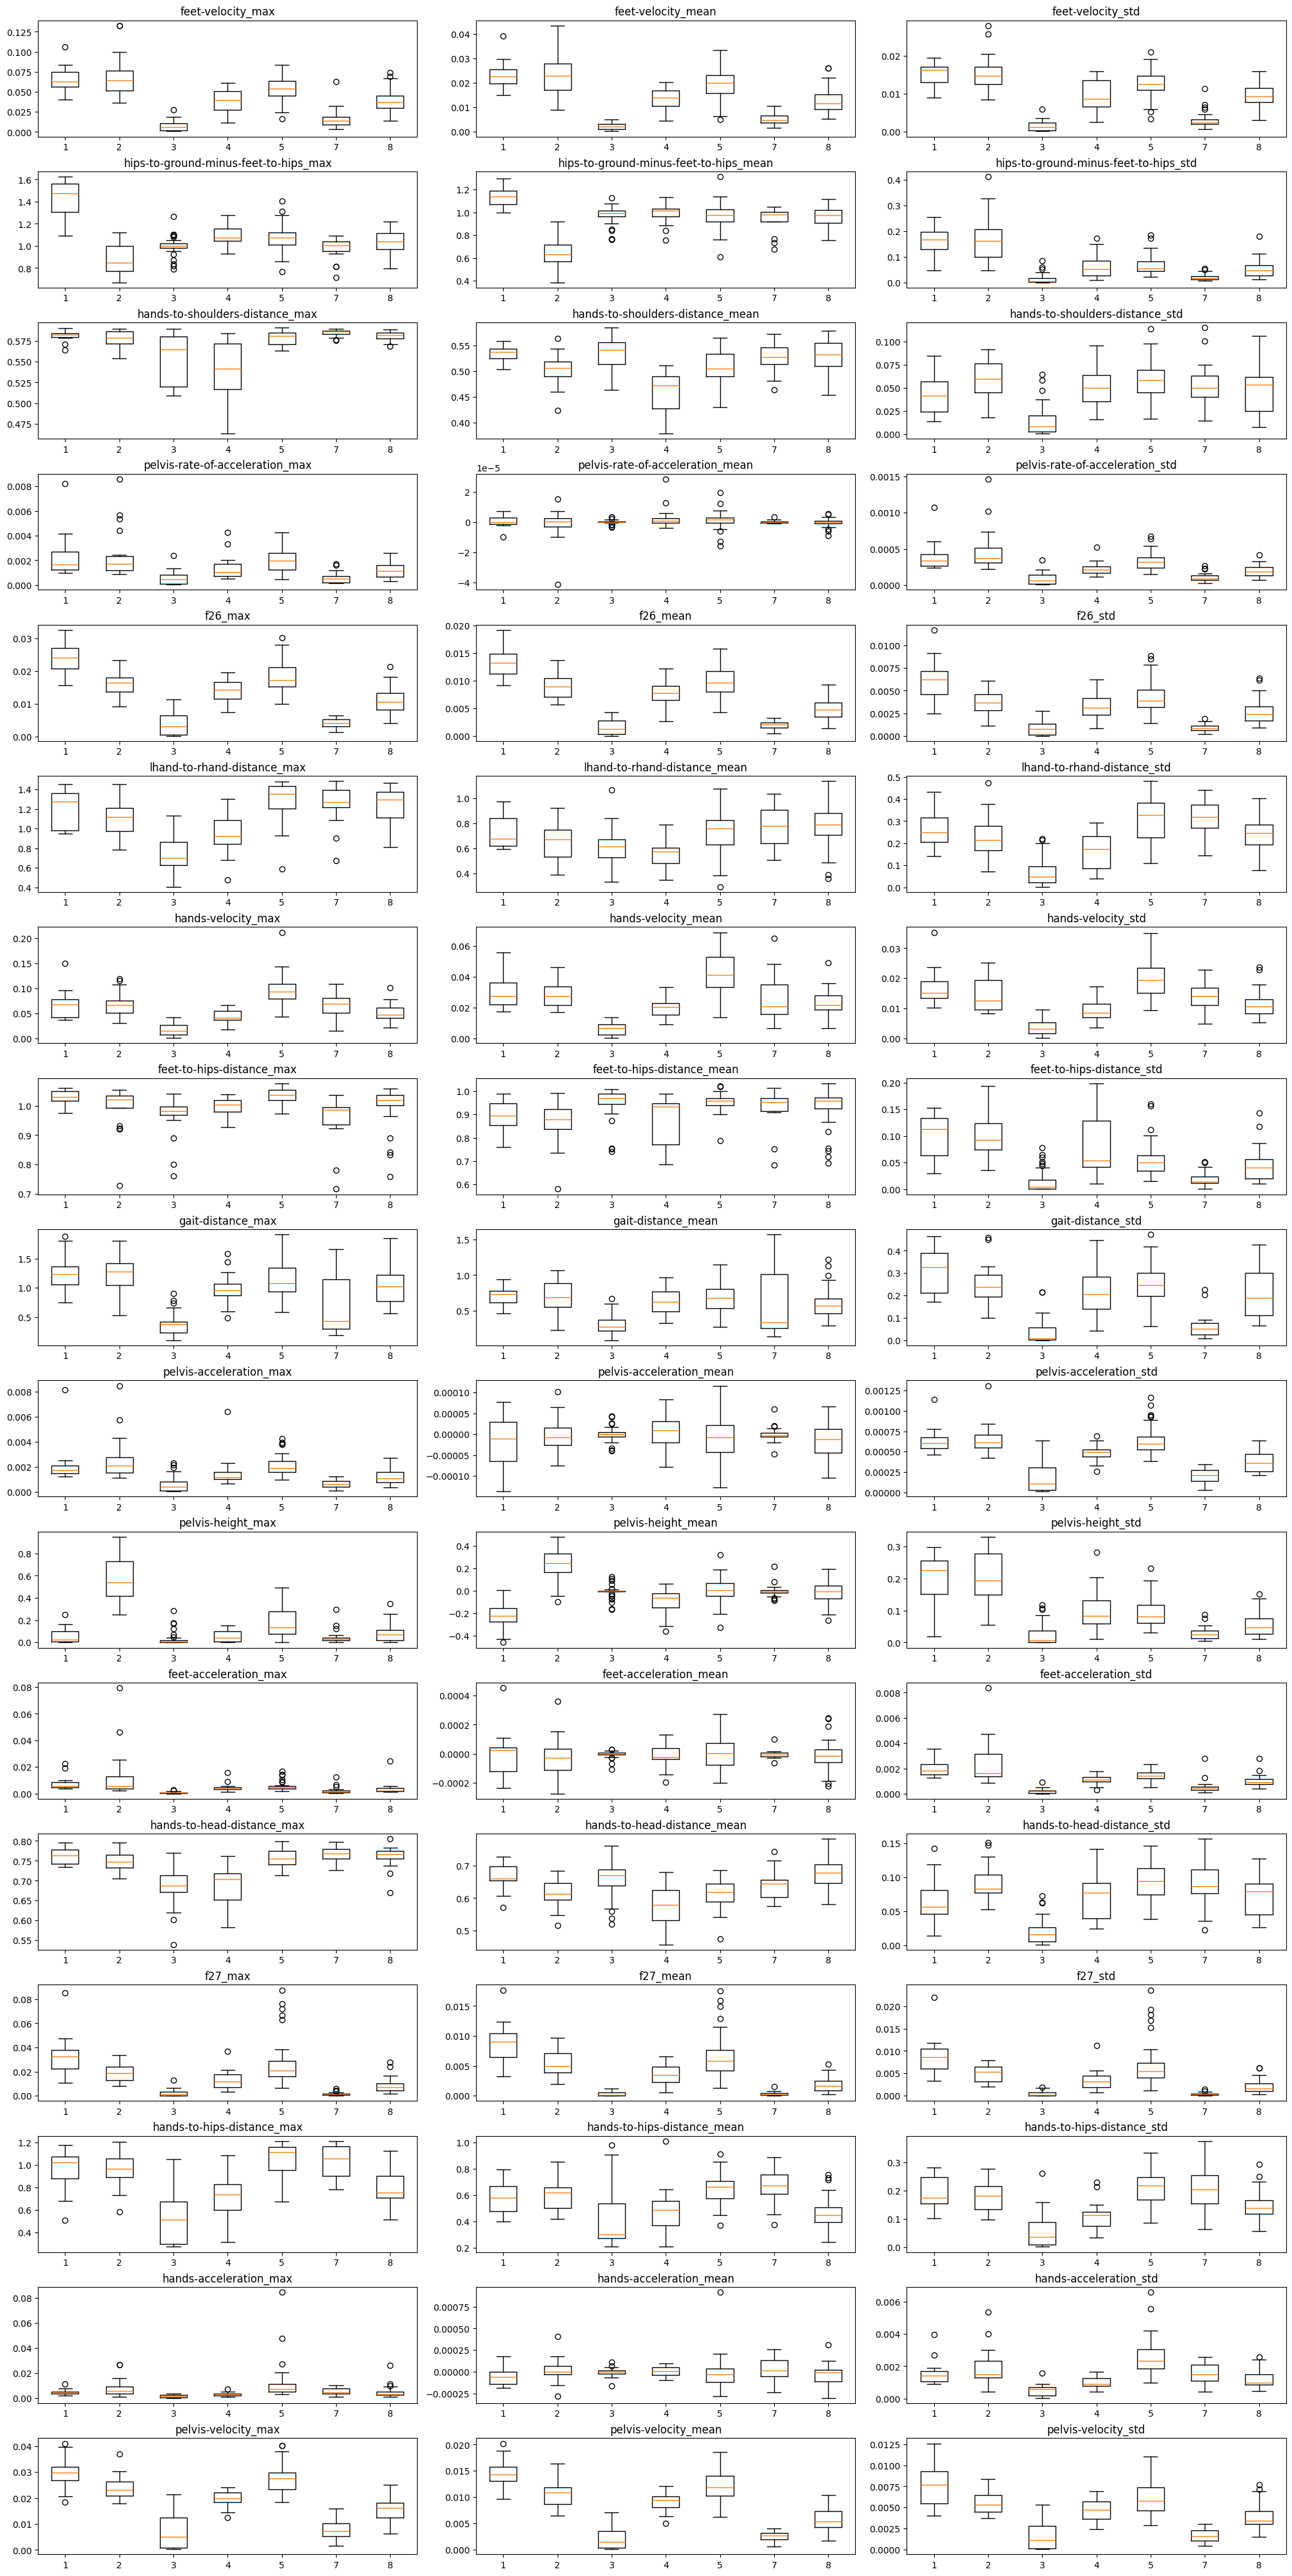

In [5]:
import matplotlib.pyplot as plt
# %matplotlib widget

fig_num = len(feats_raw)
fig, axs = plt.subplots(fig_num, 3, layout="constrained", figsize=(20, 40))

for i, feat in zip(range(len(feats_raw)), feats_raw):
    this_df = df.select(
        pl.selectors.starts_with(f'{feat}_'),
        pl.col("cluster"),
    )
    mins_all = []
    maxs_all = []
    means_all = []
    stds_all = []
    xlab_list = []
    for cluster in clusters:
        if cluster == 5:
            continue
        this_cluster_df = this_df.filter(
            pl.col("cluster") == cluster,
        )
        # LABAN
        maxs_all.append(this_cluster_df[f'{feat}_max'])
        means_all.append(this_cluster_df[f'{feat}_mean'])
        stds_all.append(this_cluster_df[f'{feat}_std'])
        xlab_list.append(cluster + 1)

    axs[i, 0].boxplot(maxs_all)
    axs[i, 0].set_title(f'{feat}_max')
    axs[i, 1].boxplot(means_all)
    axs[i, 1].set_title(f'{feat}_mean')
    axs[i, 2].boxplot(stds_all)
    axs[i, 2].set_title(f'{feat}_std')
    axs[i, 0].set_xticklabels(xlab_list)
    axs[i, 1].set_xticklabels(xlab_list)
    axs[i, 2].set_xticklabels(xlab_list)
plt.show()
   

In [ ]:
import matplotlib.pyplot as plt
%matplotlib widget

fig_num = len(feats_raw)
fig, axs = plt.subplots(fig_num, 1, layout="constrained", figsize=(8, 40))

for i, feat in zip(range(len(feats_raw)), feats_raw):
    feat_name = "_".join(feat.split("_")[0:-1])
    feat_att = feat.split("_")[-1]
    this_df = df.select(
        (pl.selectors.starts_with(feat_name) & pl.selectors.ends_with(feat_att)),
        pl.col("cluster"),
    )
    data_all = []
    data_all.append(this_df[f'{feat_name}_min_{feat_att}'])
    data_all.append(this_df[f'{feat_name}_max_{feat_att}'])
    data_all.append(this_df[f'{feat_name}_avg_{feat_att}'])
    data_all.append(this_df[f'{feat_name}_sd_{feat_att}'])

    axs[i].boxplot(data_all)
    axs[i].set_title(f'{feat}')
plt.savefig(output_file)
   

In [ ]:
import matplotlib.pyplot as plt
%matplotlib widget

fig_num = len(feats_raw)
fig, axs = plt.subplots(fig_num, 1, layout="constrained", figsize=(8, 40))

for i, feat in zip(range(len(feats_raw)), feats_raw):
    this_df = df.select(
        pl.selectors.starts_with(f'{feat}_'),
        pl.col("cluster"),
    )
    data_all = []
    data_all.append(this_df[f'{feat}_min'])
    data_all.append(this_df[f'{feat}_max'])
    data_all.append(this_df[f'{feat}_mean'])
    data_all.append(this_df[f'{feat}_std'])

    axs[i].boxplot(data_all)
    axs[i].set_title(f'{feat}')
plt.savefig(output_file)
   